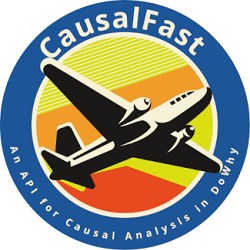
<h1>PGA Tournament Entry: Causal Inference & Effect Estimation</h1><br>

 __[Original Data](https://www.sciencedirect.com/science/article/pii/S2352340922001639)__ published by Data in Brief via ScienceDirect, and is based on the research paper: Pastoriza, D., Alegre, I., & Canela, M.A. (2021). Conditioning the effect of prize on tournament self-selection. J. Econ. Psychol., 86, 102,414. This dataset contains the determinants for athletes choice to self-select for entry to a tournament endowed with a monetary prize. Use this notebook to perform causal inference and effect estimation using the CausalFast simulator for DoWhy.<br>
 
Dimensions: 22 features and 54,915 observations<br>
Outcome: Entry_decision

<b>Steps:</b>
1) Build a DAG describing variables that effect treatment or outcome.
2) Build a causal model using 'Entry_decision' as the treatment
3) Test different treatment variables to reveal the treatment effect present in the data
4) Practice selecting the proper estimation 'method_name' (Linear Regression v Logistic Regression v ML)
5) Evaluate the refuters to understand their insights
6) Present findings of the determinants for selection into a tournament

In [1]:
#!pip install -i https://test.pypi.org/simple/ causalfast
import causalfast as cf
import pandas as pd
cf.__version__
#cf.makegraph()  #Run for assistance

'0.3.2'

<h2>Step 1: Build a Causal DAG for PGA Tournament Entry</h2>

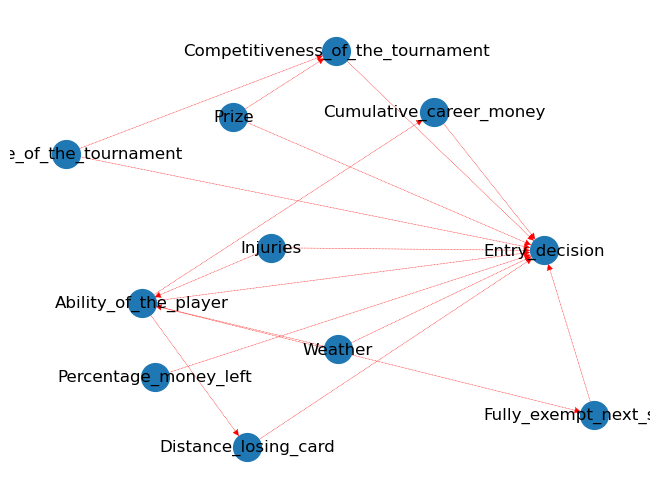

In [2]:
DATA = pd.read_csv('https://raw.githubusercontent.com/TejuOye/CausalFast/main/api/data/pga.csv')

edgelist = [('Competitiveness_of_the_tournament', "Entry_decision"), 
            ('Prestige_of_the_tournament', "Competitiveness_of_the_tournament"),
            ('Prestige_of_the_tournament', 'Entry_decision'),
            ('Percentage_money_left', 'Entry_decision'),
            ('Cumulative_career_money', 'Entry_decision'),
            ("Ability_of_the_player", "Fully_exempt_next_season"), 
            ("Ability_of_the_player", 'Cumulative_career_money'), 
            ('Ability_of_the_player', 'Distance_losing_card'), 
            ('Ability_of_the_player', 'Entry_decision'),
            ('Prize', 'Entry_decision'), 
            ('Prize', "Competitiveness_of_the_tournament"), 
            ('Injuries', 'Entry_decision'),
            ('Injuries', "Ability_of_the_player"), 
            ('Weather', 'Entry_decision'), 
            ('Weather', 'Ability_of_the_player'), 
            ('Distance_losing_card', 'Entry_decision'), 
            ('Fully_exempt_next_season', 'Entry_decision')]

DAG = cf.makegraph(function='makecausalmodel', edges=edgelist, verbose=False)

<h2>Step 2: Use the Output from the DAG to make a DoWhy CausalModel</h2>

<b>Note:</b>
The estimate value is the amount of change in the outcome when treatment is increased by 1 unit / 1 standard deviation. If ‘estimate’ is positive, that means the outcome increases with treatment, whereas a negative estimate means the outcome decreases with treatment. Evaluate the treatment effect of the following variables:
- Fully_exempt_next_season
- Injuries
- Prestige_of_the_tournament
- Percentage_money_left

In [3]:
#digraph =  """digraph { }""" 

causalmodel = cf.makegraph(function='makecausalmodel', eda=True, verbose=False,
                           dataset=DATA,
                           digraph=DAG, #OR paste """digraph { }""" from Step 1 (as a string)
                           treatment='Fully_exempt_next_season',
                           outcome='Entry_decision') 

Basic EDA:
Dimensionality:  (54915, 20)
Column Names: ['Player', 'Season', 'Chronological_order', 'Entry_decision', 'Prize', 'Competitiveness_of_the_tournament', 'Prestige_of_the_tournament', 'Ability_of_the_player', 'Cumulative_career_money', 'Injuries', 'Weather', 'Distance_residence_to_tournament_n', 'Difference_distance_home_to_tournament', 'Fully_exempt_next_season', 'Percentage_money_left', 'Distance_losing_card', 'Positive_within_period_ performance_trajectory', 'Negative_within_period_performance_trajectory', 'Positive_across_period_performance_trajectory', 'Negative_across_period_performance_trajectory']

Rounded - 2 decimals / Numeral Length - CtNa:4, Min/Avg/Max:11
int64   CtNA: 0    MIN: 1014        AVG: 7330.78     MAX: 26724       Col: Player
int64   CtNA: 0    MIN: 1996        AVG: 2001.13     MAX: 2006        Col: Season
int64   CtNA: 0    MIN: 1           AVG: 19.39       MAX: 40          Col: Chronological_order
int64   CtNA: 0    MIN: 0           AVG: 0.57        MAX

<h2>Step 3: Run CausalFast Simulator using the CausalModel Object</h2>

In [ ]:
#cf.simulator()  #Run for assistance

In [4]:
simulator = cf.simulator(causalmodel=causalmodel[0],
                         full_output=False,
                         refute=False,
                         identifier='default', #minimal-adjustment, maximal-adjustment, exhaustive-search
                         method_name='backdoor.generalized_linear_model', #GLM/Logistic used with Binary Outcome
                         method_params='default') 

Simulator Mode (Default DoWhy) Parameters: 
Identification Using: identifier=' default '
Estimation Using: method_name=' backdoor.generalized_linear_model '

Identify: 
Detected Estimand: backdoor - Estimation Options:
Note: method_name='default' uses 'backdoor.linear_regression' or 'backdoor.generalized_linear_model'
Note: method_name='default' override options include: 
   OLS Linear:  'backdoor.linear_regression'
   LogisticGLM: 'backdoor.generalized_linear_model'
   LogisticML:  'backdoor.econml.dr.LinearDRLearner'
   DoubleML:    'backdoor.econml.dml.DML'
   Propensity:  'backdoor.propensity_score_stratification'
   Propensity:  'backdoor.propensity_score_matching'
   Propensity:  'backdoor.propensity_score_weighting'

Note: Propensity Scores require both binary outcome and binary treatment variables
Note: generalized_linear_model (Logistic) & econml.dr.LinearDRLearner require a binary outcome variable
Detected binary outcome: Selecting GLM logistic regression
Detected Estimator m

<h2>Step 4: Record the resulting treatment effect estimate for each tested covariate.</h2>

How could knowledge of treatment effect from tournament entry determinants be used by the PGA to increase tournament entry? Would it be possible to identify athletes that would benefit most from an intervention to offset negative treatment effects? How could you analyze this data more closely by looking at propensity scores?  <b>Hint:</b> view titanic notebook  __[here](https://github.com/TejuOye/CausalFast/blob/main/api/notebooks/Titanic-PropensityScoreMatching-ATT.ipynb)__

Record the treatment effect:
- Fully_exempt_next_season
- Injuries
- Prestige_of_the_tournament
- Percentage_money_left